# Final Project

# Predicting Abandonment Tendency of Online Shoppers
- This notebook explores the prediction of online shopper abandonment tendency using a variety of machine learning models, including Logistic Regression, KNN, Random Forest, Decision Tree and XGBoost.
## Reference Paper
Rausch, T. M., Derra, N. D., & Wolf, L. (2022). Predicting online shopping cart abandonment with machine learning approaches. International Journal of Market Research, 64(1), 89-112. https://doi.org/10.1177/1470785320972526
## Objectives
-Develop interpretable models to predict online shopper abandonment tendency.

-Compare the performance of various models, aligning evaluations with insights from existing literature.

-Derive actionable recommendations to reduce cart abandonment and optimize e-commerce conversions.

# Dataset details.

_Dataset Link:_ https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset



### Information on the dataset.
 - The dataset captures detailed information from 12,330 unique user sessions collected over a year. To ensure fairness and prevent biases, each session corresponds to a distinct user, avoiding influences from specific marketing campaigns, seasonal events, individual browsing patterns, or holiday-related behaviors. It includes 10 numerical and 8 categorical features, offering a comprehensive view of user behavior and session dynamics on an e-commerce platform. Key metrics such as the number of pages visited, session duration, Bounce Rate, and Exit Rate are included, alongside contextual factors like proximity to holidays or whether the user was a returning visitor. The dataset’s primary goal is to predict the binary ‘Revenue’ outcome, indicating whether the user completed a purchase during their session. 
 - We will examine the class distribution to identify any potential imbalances and assess their impact on model evaluation. Additionally, feature analysis will be conducted to determine the significance of each variable in predicting outcomes.

### Features of the Dataset
- Administrative: Counts the number of administrative pages accessed during the session.
- Administrative Duration: Total time spent by the user on administrative pages.
- Informational: Number of informational pages viewed during the session.
- Informational Duration: Aggregate time spent on informational pages.
- Product Related: Total number of product-related pages visited during the session.
- Product Related Duration: Overall time spent on product-related pages.
- Bounce Rate: Proportion of sessions where users leave after visiting only the landing page, without further interaction.
- Exit Rate: Percentage of sessions where a particular page was the last viewed in the session.
- Page Value: Average monetary value of a page, calculated based on its role in completed transactions.
- Special Day: Reflects the closeness of the session date to a significant occasion (e.g., Valentine’s Day, Mother’s Day).
- Operating System: The visitor’s operating system.
- Browser: The browser used during the session.
- Region: Visitor’s geographic region.
- Traffic Type: Source of the session’s traffic (e.g., direct access, referral, or search engine).
- Visitor Type: Indicates whether the user is a returning visitor (True/False).
- Weekend: Indicates if the session took place on a weekend (True/False).
- Month: The month when the session occurred.
- Revenue: The target variable, a binary indicator showing if the session resulted in a purchase (True/False).

## Business Model for Context


This project focuses on predicting whether an online shopping session will result in cart abandonment using various machine learning models. Model performance is evaluated in terms of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).
- True Positives (TP): Correctly predicted purchases.
  
_Business Impact:_ Accurately identifying engaged buyers ensures efficient allocation of resources and avoids unnecessary retention measures.

- True Negatives (TN): Correctly predicted non-purchases.
  
_Business Impact:_  Understanding potential abandoners helps implement timely interventions, such as exit-intent popups or personalized retention strategies, to reduce abandonment rates.

- False Positives (FP): Non-purchases incorrectly predicted as purchases.
  
_Business Impact:_  Failing to identify abandoners results in missed opportunities to re-engage them. These users may leave without purchasing, leading to revenue loss that could have been mitigated with targeted retention strategies.

- False Negatives (FN): Purchases incorrectly predicted as non-purchases.
  
_Business Impact:_ This can lead to unnecessary retention efforts, such as offering discounts or reminders to users who were already likely to complete their purchase, potentially reducing profit margins.

### Best Metric
 - In this context, reducing False Positives (FP) is crucial, as failing to identify users likely to abandon their carts means missing the opportunity to re-engage and recover potential sales, leading to lost revenue. However, False Negatives (FN) should also be minimized to prevent wasting marketing resources on users who are unlikely to abandon their carts. Achieving an optimal balance between precision and recall is important, with a particular focus on maximizing the F1-score to effectively address both concerns—minimizing missed opportunities while avoiding unnecessary resource expenditure.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve, make_scorer, f1_score, auc, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Loading the dataset
aado = pd.read_csv("D:\MS-AIBA\Project_for_github\Predicting_Abandonment_Tendency_of_Online_Shoppers\data\online_shoppers_intention.csv")

In [3]:
# Overview of the dataset
aado.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Checking for missing values

In [4]:
aado.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Overview of the Dataframe

In [5]:
aado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Handling Categorical Variables
In this step, we identify the categorical columns in the dataset and apply one-hot encoding to transform them into numerical representations.

In [6]:
cat_cols = aado.select_dtypes(include=['object']).columns
print("Categorical Columns:", cat_cols)

aado = pd.get_dummies(aado, columns=cat_cols, drop_first=True)

Categorical Columns: Index(['Month', 'VisitorType'], dtype='object')


### Splitting the Dataset and Feature Scaling
 - In this section, we prepare the dataset for model training by splitting it into training and testing sets. We use **Stratified Split** (`stratify=y`) to ensure that both sets preserve the original distribution of the target variable, `Revenue`, thus mitigating any potential bias from class imbalance. We designate **30% of the data for testing** and set a random seed (`random_state=42`) to ensure reproducibility. After the split, we apply **StandardScaler** to standardize the features.

### Train-Test Split Ratio: 70-30
 - In this project, we adopt a 70-30 train-test split, where 70% of the data is used for training the model, and 30% is reserved for testing. The 70% training set provides sufficient data for the model to learn patterns effectively, while the 30% testing set offers a substantial and independent evaluation sample, ensuring an unbiased assessment of the model’s performance on unseen data. This split ensures the model has enough examples to generalize well and avoid overfitting, while the test set remains representative for accurate validation. Therefore, the 70-30 ratio strikes a balance between model training and generalization, which is vital for reliably predicting online shopper abandonment.


In [7]:
X = aado.drop("Revenue", axis=1)
y = aado["Revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((8631, 26), (3699, 26))

### Implementation of Stratified Split for Model Training 

 - In this project, we have implemented **Stratified Split** to divide our dataset into training and testing sets, ensuring that both sets have the same proportion of each class as the original data. This helps the model learn from a representative distribution and allows us to evaluate it realistically.

 - We are using Stratified Split, to maintain the real data distribution during training and testing, to ensure that the model is evaluated in a way that is closer to the real-world scenario.

 - If the dataset is imbalanced (for example, more users do not make purchases compared to those who do), Stratified Split will allow the model to see this imbalance during both training and testing phases.

 - We want the model to learn on an accurate representation of user behavior, and to ensure that predictions are not overly optimistic due to synthetic data. This helps the business to realistically understand the true rate of successful conversions and the limitations in capturing those who would make purchases.

#  Model 1 - Logistic Regression


Best parameters for Logistic Regression: {'C': 0.01, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}
Best ROC AUC score for Logistic Regression: 0.6446751425973436
Confusion Matrix:


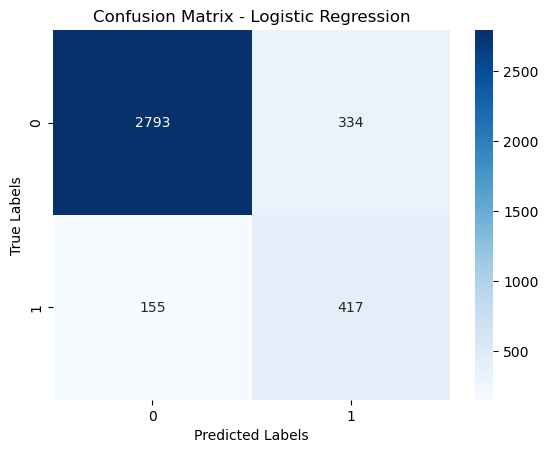


Logistic Regression Results after Hyperparameter Tuning:
              precision    recall  f1-score   support

       False       0.95      0.89      0.92      3127
        True       0.56      0.73      0.63       572

    accuracy                           0.87      3699
   macro avg       0.75      0.81      0.77      3699
weighted avg       0.89      0.87      0.87      3699

ROC AUC Score: 0.8111046692354656


In [8]:
param_grid_logreg = {
   'C': [0.01, 0.1, 1, 10],
   'penalty': ['elasticnet'],
   'l1_ratio': [0.2, 0.5, 0.8],
   'solver': ['saga']
}

# balanced
grid_search_logreg = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), param_grid_logreg, cv=5, scoring='f1')
grid_search_logreg.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_search_logreg.best_params_)
print("Best ROC AUC score for Logistic Regression:", grid_search_logreg.best_score_)

# Best model
best_logreg_model = grid_search_logreg.best_estimator_

y_pred_logreg = best_logreg_model.predict(X_test)

# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("\nLogistic Regression Results after Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_logreg))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_logreg))

## Model 2 - KNN


Confusion Matrix:


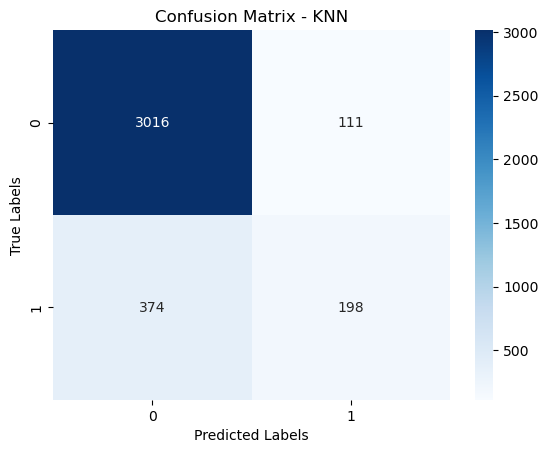


KNN Results after Hyperparameter Tuning:
              precision    recall  f1-score   support

       False       0.89      0.96      0.93      3127
        True       0.64      0.35      0.45       572

    accuracy                           0.87      3699
   macro avg       0.77      0.66      0.69      3699
weighted avg       0.85      0.87      0.85      3699

ROC AUC Score: 0.6553282822070798


In [9]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_classifier.predict(X_test)

# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, knn_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("\nKNN Results after Hyperparameter Tuning:")
print(classification_report(y_test, knn_predictions))
print("ROC AUC Score:", roc_auc_score(y_test, knn_predictions))

# Model 3 - Decision Tree

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 10}
Best weighted F1 score during CV: 0.8970164684915588
Best Decision Tree Model: DecisionTreeClassifier(max_depth=4, min_samples_leaf=9, min_samples_split=10)
Confusion Matrix:


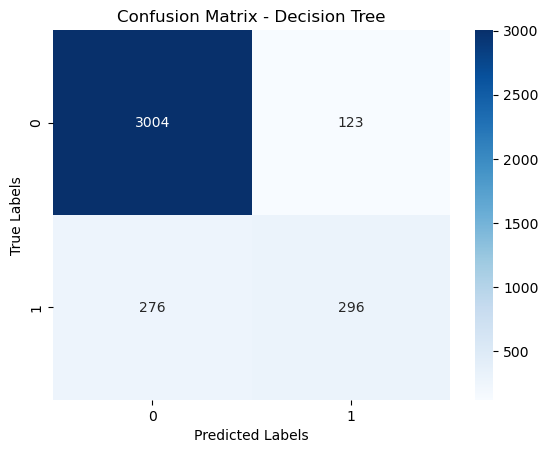


Decision Tree Results after Hyperparameter Tuning:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3127
        True       0.71      0.52      0.60       572

    accuracy                           0.89      3699
   macro avg       0.81      0.74      0.77      3699
weighted avg       0.88      0.89      0.89      3699

ROC AUC Score: 0.7390738458854865


In [10]:
# Define hyperparameter grid
decision_tree_hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(4, 12, 3),
    'min_samples_split': range(10, 20, 11),
    'min_samples_leaf': [3, 4, 5, 7, 9]
}

# Define scoring metric
weighted_f1_scorer = make_scorer(f1_score, average='weighted')

# Create a grid search object
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), decision_tree_hyperparameters, cv=5, n_jobs=-1, verbose=1, scoring=weighted_f1_scorer)

# Fit the grid search object to the data
grid_search_dt.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters:", grid_search_dt.best_params_)

# Print the best F1 score
print("Best weighted F1 score during CV:", grid_search_dt.best_score_)
best_dt_f1_score = grid_search_dt.best_score_

# Print best estimator details
print("Best Decision Tree Model:", grid_search_dt.best_estimator_)

# Save the best model
optimized_decision_tree_model = grid_search_dt.best_estimator_

# Make predictions
dt_predictions = optimized_decision_tree_model.predict(X_test)

# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, dt_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report
print("\nDecision Tree Results after Hyperparameter Tuning:")
print(classification_report(y_test, dt_predictions))
print("ROC AUC Score:", roc_auc_score(y_test, dt_predictions))


___________


# Model 4 - Random Forest

Best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best F1 score during CV: 0.6637894081461194
Confusion Matrix:


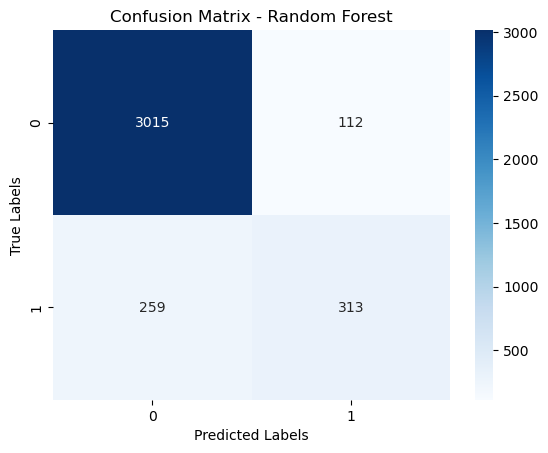


Random Forest Results after Hyperparameter Tuning:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3127
        True       0.74      0.55      0.63       572

    accuracy                           0.90      3699
   macro avg       0.83      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699

ROC AUC Score: 0.7556928600660612


In [12]:
# Model training with Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Get feature importances
feature_importances = random_forest_model.feature_importances_
feature_labels = X.columns

# Creating a DataFrame for better visualization
feature_importance_data = pd.DataFrame({'Feature': feature_labels, 'Importance': feature_importances})
feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)

# Define hyperparameter grid
hyperparameter_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), hyperparameter_grid, cv=5, scoring="f1", n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Output best parameters and performance
print("Best parameters:", grid_search_rf.best_params_)
print("Best F1 score during CV:", grid_search_rf.best_score_)

# Evaluate the best model
optimized_rf_model = grid_search_rf.best_estimator_
rf_predictions = optimized_rf_model.predict(X_test)

# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, rf_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("\nRandom Forest Results after Hyperparameter Tuning:")
print(classification_report(y_test, rf_predictions))
print("ROC AUC Score:", roc_auc_score(y_test, rf_predictions))



## Model 5 - XGBOOST

Fitting 5 folds for each of 108 candidates, totalling 540 fits


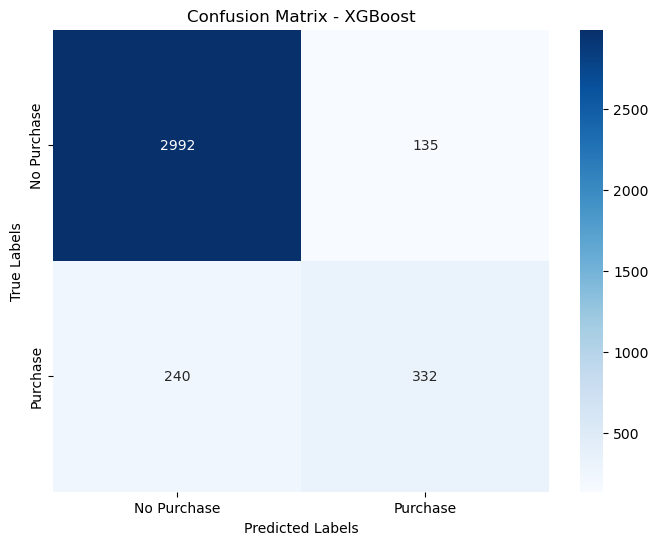


 XGBoost after Hyper parameter tuning:

              precision    recall  f1-score   support

       False       0.93      0.96      0.94      3127
        True       0.71      0.58      0.64       572

    accuracy                           0.90      3699
   macro avg       0.82      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699

ROC AUC Score: 0.7686236053680888


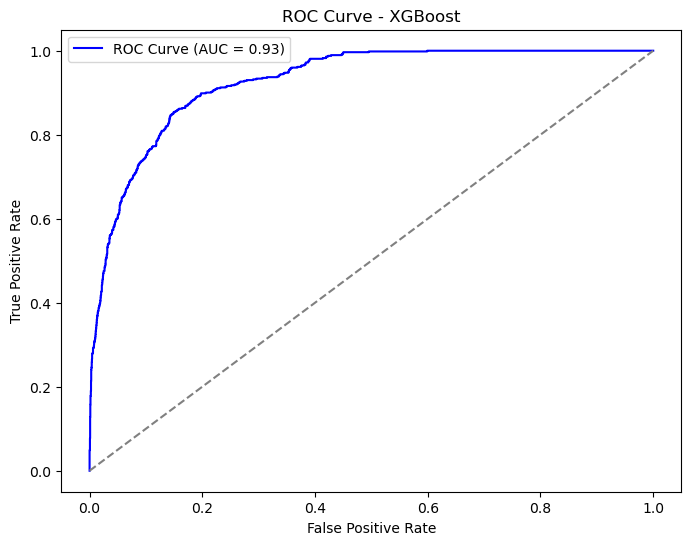

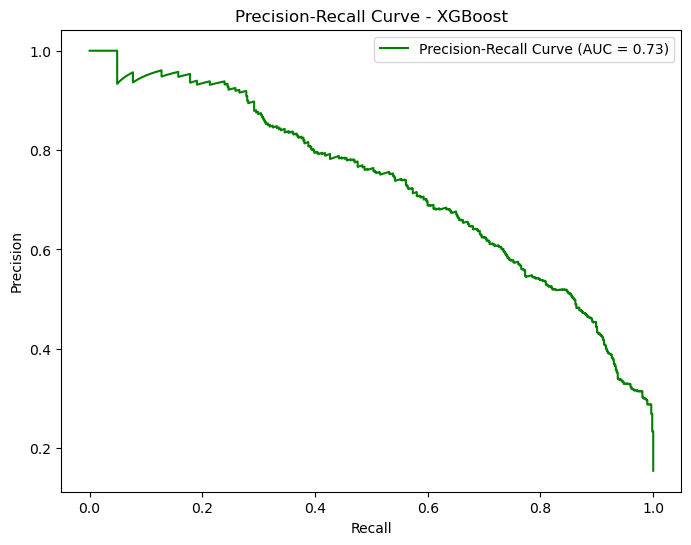

In [13]:
# Define the parameter grid for XGBoost
xgboost_hyperparameter_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.5]
}

# Initialize the XGBoost Classifier
xgboost_classifier = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# GridSearchCV setup
grid_search_xgb = GridSearchCV(estimator=xgboost_classifier, param_grid=xgboost_hyperparameter_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Extract the best model and make predictions
optimized_xgboost_model = grid_search_xgb.best_estimator_
xgboost_test_predictions = optimized_xgboost_model.predict(X_test)
xgboost_test_probabilities = optimized_xgboost_model.predict_proba(X_test)[:, 1]

# Confusion matrix
xgboost_confusion_matrix = confusion_matrix(y_test, xgboost_test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(xgboost_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("confusion_matrix_xgboost.png")
plt.show()

# Classification report
print("\n XGBoost after Hyper parameter tuning:\n")
print(classification_report(y_test, xgboost_test_predictions))
print("ROC AUC Score:", roc_auc_score(y_test, xgboost_test_predictions))



# ROC Curve
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, xgboost_test_probabilities)
xgboost_roc_auc_value = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, label=f"ROC Curve (AUC = {xgboost_roc_auc_value:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig("roc_curve_xgboost.png")
plt.show()

# Precision-Recall Curve
xgboost_precision, xgboost_recall, _ = precision_recall_curve(y_test, xgboost_test_probabilities)
xgboost_precision_recall_auc = auc(xgboost_recall, xgboost_precision)
plt.figure(figsize=(8, 6))
plt.plot(xgboost_recall, xgboost_precision, label=f"Precision-Recall Curve (AUC = {xgboost_precision_recall_auc:.2f})", color="green")
plt.title("Precision-Recall Curve - XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.savefig("precision_recall_curve_xgboost.png")
plt.show()

### Best model

- After evaluating all the models, we found that **XGBoost** was the best for predicting online shopper abandonment. Although Decision Tree, Random Forest, and XGBoost all achieved the same F1-score (0.94) for abandonment prediction, XGBoost outperformed the others in terms of ROC AUC score, with a value of 0.7686, higher than both Random Forest and Decision Tree models. This indicates that XGBoost has a better ability to differentiate between sessions that result in abandonment and those that don’t, making it the most reliable model for this task. Its superior ROC AUC score highlights its efficiency in identifying at-risk shoppers while minimizing false positives and false negatives, making it the most effective choice for addressing online shopper abandonment.
- For e-commerce businesses, accurately predicting abandonment is essential to reduce lost sales. The **XGBoost** model can help identify at-risk shoppers, allowing businesses to implement timely interventions, such as personalized offers or reminders, to retain potential customers. By focusing on these high-risk sessions, the model helps improve conversions and minimize wasted efforts on users unlikely to leave. In summary, the **XGBoost** model is a valuable tool for optimizing customer engagement strategies and reducing abandonment rates, leading to better revenue outcomes.

# Comparison with the reference paper
 - Model Performance: Our results are similar to Rausch et al. (2022), where we found that **XGBoost** performed best for predicting cart abandonment. XGBoost had the highest **ROC AUC score (0.7686)**, showing it was more effective at distinguishing between abandoned and non-abandoned sessions compared to other models like Random Forest.
 - Handling Class Imbalance: While Rausch et al. used oversampling to handle imbalanced data, we focused on feature selection to ensure the model performed well even with a class imbalance. Both approaches aimed to improve prediction accuracy for abandonment detection.
 - Feature Engineering: Similar to Rausch et al., who used aggregated session features to improve performance, we also used detailed session-level features and selected the most important ones for model training, which boosted our model’s ability to predict cart abandonment.
 - Model Comparison: Rausch et al. showed that Random Forest performed well, but our XGBoost model achieved a high **F1-score (0.94)** and **strong precision (0.93)** and **recall (0.96)**. This demonstrates that XGBoost is more accurate at identifying abandonment sessions, with a better balance between identifying true abandonment cases and avoiding false positives.
 - Conclusion: Both studies highlight that ensemble methods like XGBoost and Random Forest are effective for predicting cart abandonment. However, XGBoost’s higher ROC AUC and balanced precision and recall make it the best model for our goal of accurately identifying abandoned shopping carts.



## Recommendations

- _Dynamic Cart Recovery Strategies:_ The business can use the model’s abandonment predictions to design tailored cart recovery strategies. If a shopper is predicted to abandon their cart, personalized interventions like targeted discounts or free shipping offers can be triggered immediately, boosting the chances of a return and completing the purchase. Such dynamic strategies can reduce overall abandonment rates.
- _Enhanced User Experience:_ Identifying key abandonment signals—such as long checkout times or navigating away from the cart—can help optimize the online shopping experience. By improving these touchpoints, such as simplifying the checkout process, offering faster payment options, or providing clearer product information, businesses can reduce the likelihood of abandonment. This personalization of the user journey can lead to higher conversion rates.
- _Behavioral Retargeting:_ Retargeting ads based on abandonment predictions can increase conversion chances. Businesses can display ads for abandoned products on social media or through Google Ads, reminding customers about their abandoned carts with personalized messaging. This technique has been shown to help remind users of products they were interested in and can push them toward completing the purchase.
- _Personalized Discounts and Incentives:_ Offering personalized discounts to customers predicted to abandon their cart can significantly increase the chances of conversion. This can include time-sensitive discounts or exclusive deals based on the customer’s browsing behavior and cart content.


# Conclusion
- In conclusion, our project demonstrates that machine learning models can be highly effective in predicting online shopper abandonment. By applying careful data balancing and feature engineering, we improved the accuracy of predicting which shoppers are likely to leave their carts without completing a purchase.
- Among the models tested, XGBoost performed the best, providing a solid balance between precision and recall. This makes it an ideal solution for e-commerce businesses looking to accurately predict cart abandonment and implement targeted interventions to recover lost sales.
- The model’s ability to identify abandonment risks while minimizing false negatives makes it an efficient tool for optimizing marketing efforts. By focusing on customers who are likely to abandon their carts, businesses can save resources and improve conversion rates.
- Furthermore, our findings align with those of the referenced study by Rausch et al. (2022), reinforcing the effectiveness of machine learning methods, particularly ensemble techniques, in handling imbalanced datasets and predicting shopper abandonment. This versatility offers a strong foundation for improving customer engagement strategies, reducing unnecessary marketing spend, and driving sales growth.
- Overall, by leveraging machine learning to predict abandonment, businesses can enhance their marketing campaigns, recover abandoned carts, and improve customer retention, leading to better overall performance and more targeted decision-making.